In [123]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import r2_score


In [124]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [125]:
df= pd.read_csv('proc_data/8_resampled.csv')

# df = df.dropna()

numerics = ['int16', 'int32', 'int64','float16', 'float32', 'float64']

df = df.select_dtypes(include=numerics)

df = df.dropna()

df.shape

(223, 1384)

In [126]:
X = df.drop('target', axis=1)
y = df['target'].astype(int)

In [127]:
class AverageBaseline:
    def __init__(self):
        avg = np.nan

    def fit(self, X, y):
        self.avg = np.mean(y)

    def predict(self, X):
        return np.full(X.shape[0], self.avg)

In [128]:
# Networks
bl = AverageBaseline()
lr = LinearRegression()
rf = RandomForestRegressor()
svm = SVR()
nn = MLPRegressor(activation='logistic')
dt = DecisionTreeRegressor()
nb = GaussianNB()
br = GradientBoostingRegressor()
networks = [bl,lr,  nn, dt, nb,rf, svm, br]

In [129]:
mseses, scoreses, maeses = [], [], []
for network in tqdm(networks):
    mses, scores, maes = [], [], []
    for run in tqdm(range(18)):
        train_X, test_X, y_train, y_test = train_test_split(X,y, test_size=0.2)
        # Fit and test
        network.fit(train_X, y_train)
        pred = network.predict(test_X)

        # Metrics
        score = r2_score(y_test, pred)
        mse =np.mean(np.square(y_test-pred))
        mae = np.mean(np.abs(y_test-pred))
        mses.append(mse); scores.append(score); maes.append(mae)
       
    mseses.append(mses)
    scoreses.append(scores)
    maeses.append(maes)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

 Text(1, 0, 'avg bl'),
 Text(2, 0, 'lr'),
 Text(3, 0, 'nn'),
 Text(4, 0, 'dt'),
 Text(5, 0, 'nb'),
 Text(6, 0, 'rf'),
 Text(7, 0, 'svm'),
 Text(8, 0, 'br'),
 Text(1, 0, 'avg bl'),
 Text(2, 0, 'lr'),
 Text(3, 0, 'nn'),
 Text(4, 0, 'dt'),
 Text(5, 0, 'nb'),
 Text(6, 0, 'rf'),
 Text(7, 0, 'svm'),
 Text(8, 0, 'br'),
 Text(1, 0, 'avg bl'),
 Text(2, 0, 'lr'),
 Text(3, 0, 'nn'),
 Text(4, 0, 'dt'),
 Text(5, 0, 'nb'),
 Text(6, 0, 'rf'),
 Text(7, 0, 'svm'),
 Text(8, 0, 'br')]

<Figure size 1152x576 with 0 Axes>

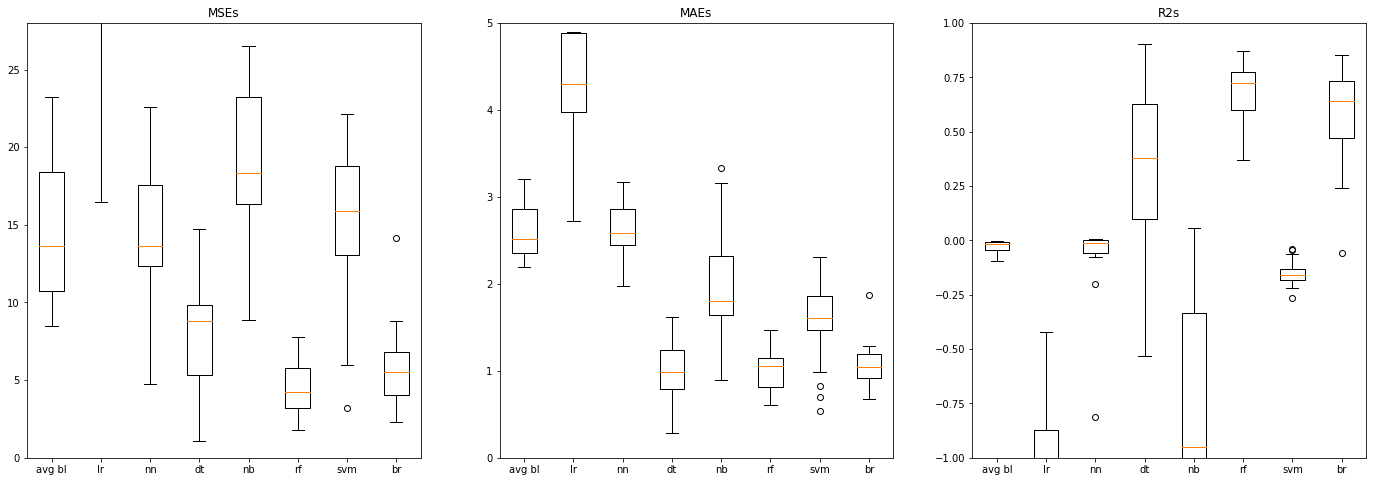

In [157]:
figure(figsize=(16,8))
fig, axs = plt.subplots(ncols=3)


fig.set_figheight(8)
fig.set_figwidth(24)

axs[0].boxplot(mseses)
axs[0].set_ylim([0, 28])
axs[0].set_title('MSEs')

axs[1].boxplot(maeses)
axs[1].set_ylim([0, 5])
axs[1].set_title('MAEs')


axs[2].boxplot(scoreses)
axs[2].set_ylim([-1, 1])
axs[2].set_title('R2s')



plt.setp(axs, xticks=[1,2,3,4,5,6,7,8], xticklabels=['avg bl','lr', 'nn', 'dt', 'nb','rf', 'svm', 'br'])



In [192]:
import pingouin as pg
aovs = pd.DataFrame()

for comparison, name in zip([mseses, maeses, scoreses], ['mseses', 'maeses', 'scoreses']):
    temp = pd.DataFrame(columns=['score', 'group'])
    for scorelist, group in zip(comparison, ['avg bl','lr', 'nn', 'dt', 'nb','rf', 'svm', 'br']):
        for score in scorelist:
            temp=temp.append({'score': score, 'group': group}, ignore_index=True)

    aov = pg.anova(data=temp, dv='score', between='group', detailed=True)
    aov.index = [name, ""]
    aovs=aovs.append(aov.round(3))

print(str(aovs.round(3).to_latex()).replace('\\toprule', '\\hline').replace('\\midrule', '\\hline').replace('\\bottomrule', '\\hline').replace('NaN', ''))


\begin{tabular}{llrrrrrr}
\hline
{} &  Source &            SS &   DF &          MS &       F &  p-unc &    np2 \\
\hline
mseses   &   group &  3.010826e+06 &    7 &  430117.979 &   3.656 &  0.001 &  0.158 \\
         &  Within &  1.600116e+07 &  136 &  117655.599 &     NaN &    NaN &    NaN \\
maeses   &   group &  2.957250e+02 &    7 &      42.246 &  33.035 &  0.000 &  0.630 \\
         &  Within &  1.739240e+02 &  136 &       1.279 &     NaN &    NaN &    NaN \\
scoreses &   group &  1.469330e+04 &    7 &    2099.043 &   4.071 &  0.000 &  0.173 \\
         &  Within &  7.012162e+04 &  136 &     515.600 &     NaN &    NaN &    NaN \\
\hline
\end{tabular}



In [186]:
from scipy import stats
import mne 

allps = []
for comparison, name in zip([mseses, maeses, scoreses], ['mseses', 'maeses', 'scoreses']):
    ps = []
    print(name)
    for scorelist, group in zip(comparison, ['avg bl','lr', 'nn', 'dt', 'nb','rf', 'svm', 'br']):
        t = stats.ttest_ind(comparison[5], scorelist)
        if group != 'rf': ps.append(t.pvalue)
    allps.append(ps)

flat = np.array(allps).flatten()
reject, pscorrected = mne.stats.bonferroni_correction(flat, alpha=0.05)
allps = np.array(pscorrected).reshape((3, 7))
table = pd.DataFrame(allps, columns=['avg bl','lr', 'nn', 'dt', 'nb', 'svm', 'br'])
table.index = ['MSE', 'MAE', 'R2']
table = table.round(3)
for col in table.columns:
    table[col] = table[col].astype(str).replace('0.0', '$< 0.001$').replace('1.0', '$> 0.999$')
print(table.to_latex( escape=False))


mseses
maeses
scoreses
\begin{tabular}{llllllll}
\toprule
{} &     avg bl &         lr &         nn &         dt &         nb &        svm &         br \\
\midrule
MSE &  $< 0.001$ &  $> 0.999$ &  $< 0.001$ &      0.015 &  $< 0.001$ &  $< 0.001$ &  $> 0.999$ \\
MAE &  $< 0.001$ &  $< 0.001$ &  $< 0.001$ &  $> 0.999$ &  $< 0.001$ &      0.005 &  $> 0.999$ \\
R2  &  $< 0.001$ &      0.995 &  $< 0.001$ &       0.02 &  $< 0.001$ &  $< 0.001$ &  $> 0.999$ \\
\bottomrule
\end{tabular}

